In [1]:
import pandas as pd
import sklearn
import pyspark

from pyspark import *

In [9]:
from sklearn.feature_extraction.text import CountVectorizer


In [2]:
from sklearn.decomposition import *
from sklearn.cluster import *
from sklearn.preprocessing import *
from sklearn.metrics import *

In [3]:
import matplotlib.pyplot as plt

In [4]:
import numpy as np

In [5]:
import scipy.cluster.hierarchy as shc

In [6]:
data_df = pd.read_parquet('./encoding2_cleaned_summaries.parquet')


In [7]:
data_df = data_df.reset_index(drop = True)

In [8]:
data_df.head()

,title_cmu,cleaned,encoding
0,Animal Farm,old major old boar manor farm call anim farm...,"[0.03993112, -0.045367185, -0.010106152, -0.04..."
1,A Clockwork Orange,alex teenag live nearfutur england lead gang...,"[0.045236286, -0.04591964, -0.04587054, -0.044..."
2,The Plague,text plagu divid five part town oran thousan...,"[0.03912394, -0.04686896, -0.046850514, -0.046..."
3,An Enquiry Concerning Human Understanding,argument enquiri proce seri increment step se...,"[0.04613054, -0.046128962, -0.046130493, -0.04..."
4,A Fire Upon the Deep,novel posit space around milki way divid conce...,"[0.04831786, -0.04820401, -0.048271615, -0.043..."


In [10]:
encoding_dt = data_df.drop('title_cmu',axis= 1).values

In [11]:
list_encoding = data_df.encoding.values.tolist()

In [12]:
fin_values  = np.stack(list_encoding,axis=0)

In [13]:
actual_data = pd.DataFrame(fin_values)

In [14]:
pca = PCA(n_components =512)
X_principal = pca.fit_transform(fin_values)
X_principal = pd.DataFrame(X_principal)
# X_principal.columns = ['P1', 'P2']

In [15]:
print(pca.explained_variance_ratio_*100)

[1.44512100e+01 4.19486380e+00 2.65160012e+00 2.13466740e+00
 1.65006924e+00 1.53169215e+00 1.37516367e+00 1.26051784e+00
 1.20691717e+00 1.15614295e+00 1.07226229e+00 9.86562848e-01
 9.37128723e-01 9.23534572e-01 8.70596409e-01 8.60012949e-01
 8.09617460e-01 8.03283036e-01 7.60367811e-01 7.41068244e-01
 7.29929686e-01 7.01357186e-01 6.76569700e-01 6.67405009e-01
 6.52741611e-01 6.35449886e-01 6.34464681e-01 6.26014948e-01
 6.00127995e-01 5.95519245e-01 5.91178775e-01 5.83382845e-01
 5.76341927e-01 5.75065494e-01 5.66953659e-01 5.58987141e-01
 5.55293739e-01 5.50155282e-01 5.29268801e-01 5.25556684e-01
 5.21215260e-01 5.09755492e-01 5.03233314e-01 4.94963080e-01
 4.88555342e-01 4.83879507e-01 4.74068284e-01 4.70714539e-01
 4.67103213e-01 4.65322882e-01 4.53212500e-01 4.45857406e-01
 4.41264540e-01 4.40044016e-01 4.29546893e-01 4.26336646e-01
 4.17408109e-01 4.13156539e-01 4.12828803e-01 4.09692258e-01
 4.07291263e-01 4.03284281e-01 3.99063349e-01 3.94779384e-01
 3.92793208e-01 3.863341

In [16]:
print(pca.singular_values_)


[33.434513   18.013655   14.321777   12.850144   11.297803   10.885005
 10.313833    9.874552    9.662325    9.456898    9.107379    8.735852
  8.514174    8.452194    8.206375    8.156342    7.913759    7.88274
  7.669283    7.571327    7.5142117   7.3656745   7.2343445   7.1851797
  7.105809    7.011058    7.0056205   6.958814    6.813415    6.7872024
  6.7624226   6.717686    6.6770253   6.6696267   6.6224194   6.5757275
  6.5539675   6.5235734   6.3985424   6.3760643   6.3496747   6.279483
  6.239181    6.1877007   6.1475177   6.1180286   6.055686    6.034228
  6.011036    5.99957     5.9209833   5.8727417   5.8424153   5.8343296
  5.7643213   5.742741    5.6822896   5.6532764   5.651034    5.629525
  5.613005    5.585326    5.5560203   5.526118    5.512199    5.46669
  5.4238048   5.3924      5.3678474   5.342488    5.2902226   5.269927
  5.252931    5.2320476   5.2083764   5.189878    5.1841865   5.168127
  5.132791    5.126996    5.1152277   5.067682    5.0463614   5.0334563
  5

In [17]:
sum(pca.explained_variance_ratio_)

0.9999999023466444

In [18]:
len(pca.explained_variance_ratio_[np.where(pca.singular_values_>=5)])

85

In [19]:
sum(pca.explained_variance_ratio_[np.where(pca.singular_values_>=5)])

0.7071202739607543

In [20]:
pca = PCA(n_components =85)
X_principal = pca.fit_transform(fin_values)
X_principal = pd.DataFrame(X_principal)

In [21]:
X_principal

,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,84
0,0.467239,-0.210728,0.108010,-0.217368,-0.027079,-0.037307,0.122892,-0.043683,0.009310,0.024351,...,0.031567,-0.018400,-0.010011,-0.011239,0.014743,0.005564,-0.025230,0.029371,-0.005909,0.007109
1,0.492059,-0.260700,0.029518,-0.159083,-0.006647,0.054170,0.065364,0.005939,0.057947,0.008707,...,-0.016467,0.019392,0.015472,0.074851,-0.000578,0.006337,0.015620,-0.045374,-0.029067,-0.008762
2,0.563738,-0.038619,-0.045374,0.019560,0.016252,0.003789,-0.057911,-0.042234,-0.009195,-0.187612,...,0.000078,0.007527,0.052732,0.016878,-0.006963,-0.003661,-0.014999,0.009885,0.009347,-0.020947
3,0.513301,-0.192076,0.018828,0.005214,-0.049199,0.017538,0.149855,-0.092374,0.059806,-0.022236,...,-0.037828,0.059295,0.105023,0.038599,-0.040866,0.010325,0.011429,0.021029,-0.058608,0.000632
4,0.443349,0.100350,0.155443,0.188119,-0.061818,-0.114987,-0.100866,0.046292,0.034127,-0.113553,...,0.032127,0.005994,0.026867,-0.015632,0.012700,-0.007546,-0.021070,0.016415,-0.008113,0.017815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11307,-0.152338,0.138789,0.039243,-0.198627,0.214749,0.102688,0.066487,0.061625,0.054010,-0.104677,...,-0.032127,0.032190,0.083836,0.053103,0.059271,-0.027127,-0.087195,0.008399,0.015934,0.025790
11308,-0.038683,0.281119,-0.225497,-0.154141,0.040946,0.173586,-0.028986,-0.044816,-0.035616,-0.118974,...,-0.028436,-0.034014,0.028938,0.025781,-0.003945,-0.015481,-0.018850,-0.049738,0.016293,0.033830
11309,0.511636,-0.236018,0.113263,-0.207307,-0.079316,-0.026045,0.042234,0.005999,-0.013491,0.041471,...,0.024243,-0.045135,-0.031784,-0.023191,-0.044577,-0.001665,0.008141,0.008703,-0.024243,-0.004762
11310,-0.114254,0.114000,-0.219595,-0.105892,0.140689,-0.063680,0.106736,-0.134171,-0.029863,-0.102723,...,-0.009481,-0.010699,-0.070499,0.067541,-0.001287,-0.071954,-0.003306,0.073246,-0.010085,-0.015300


In [22]:
sample_data = X_principal[:1000]

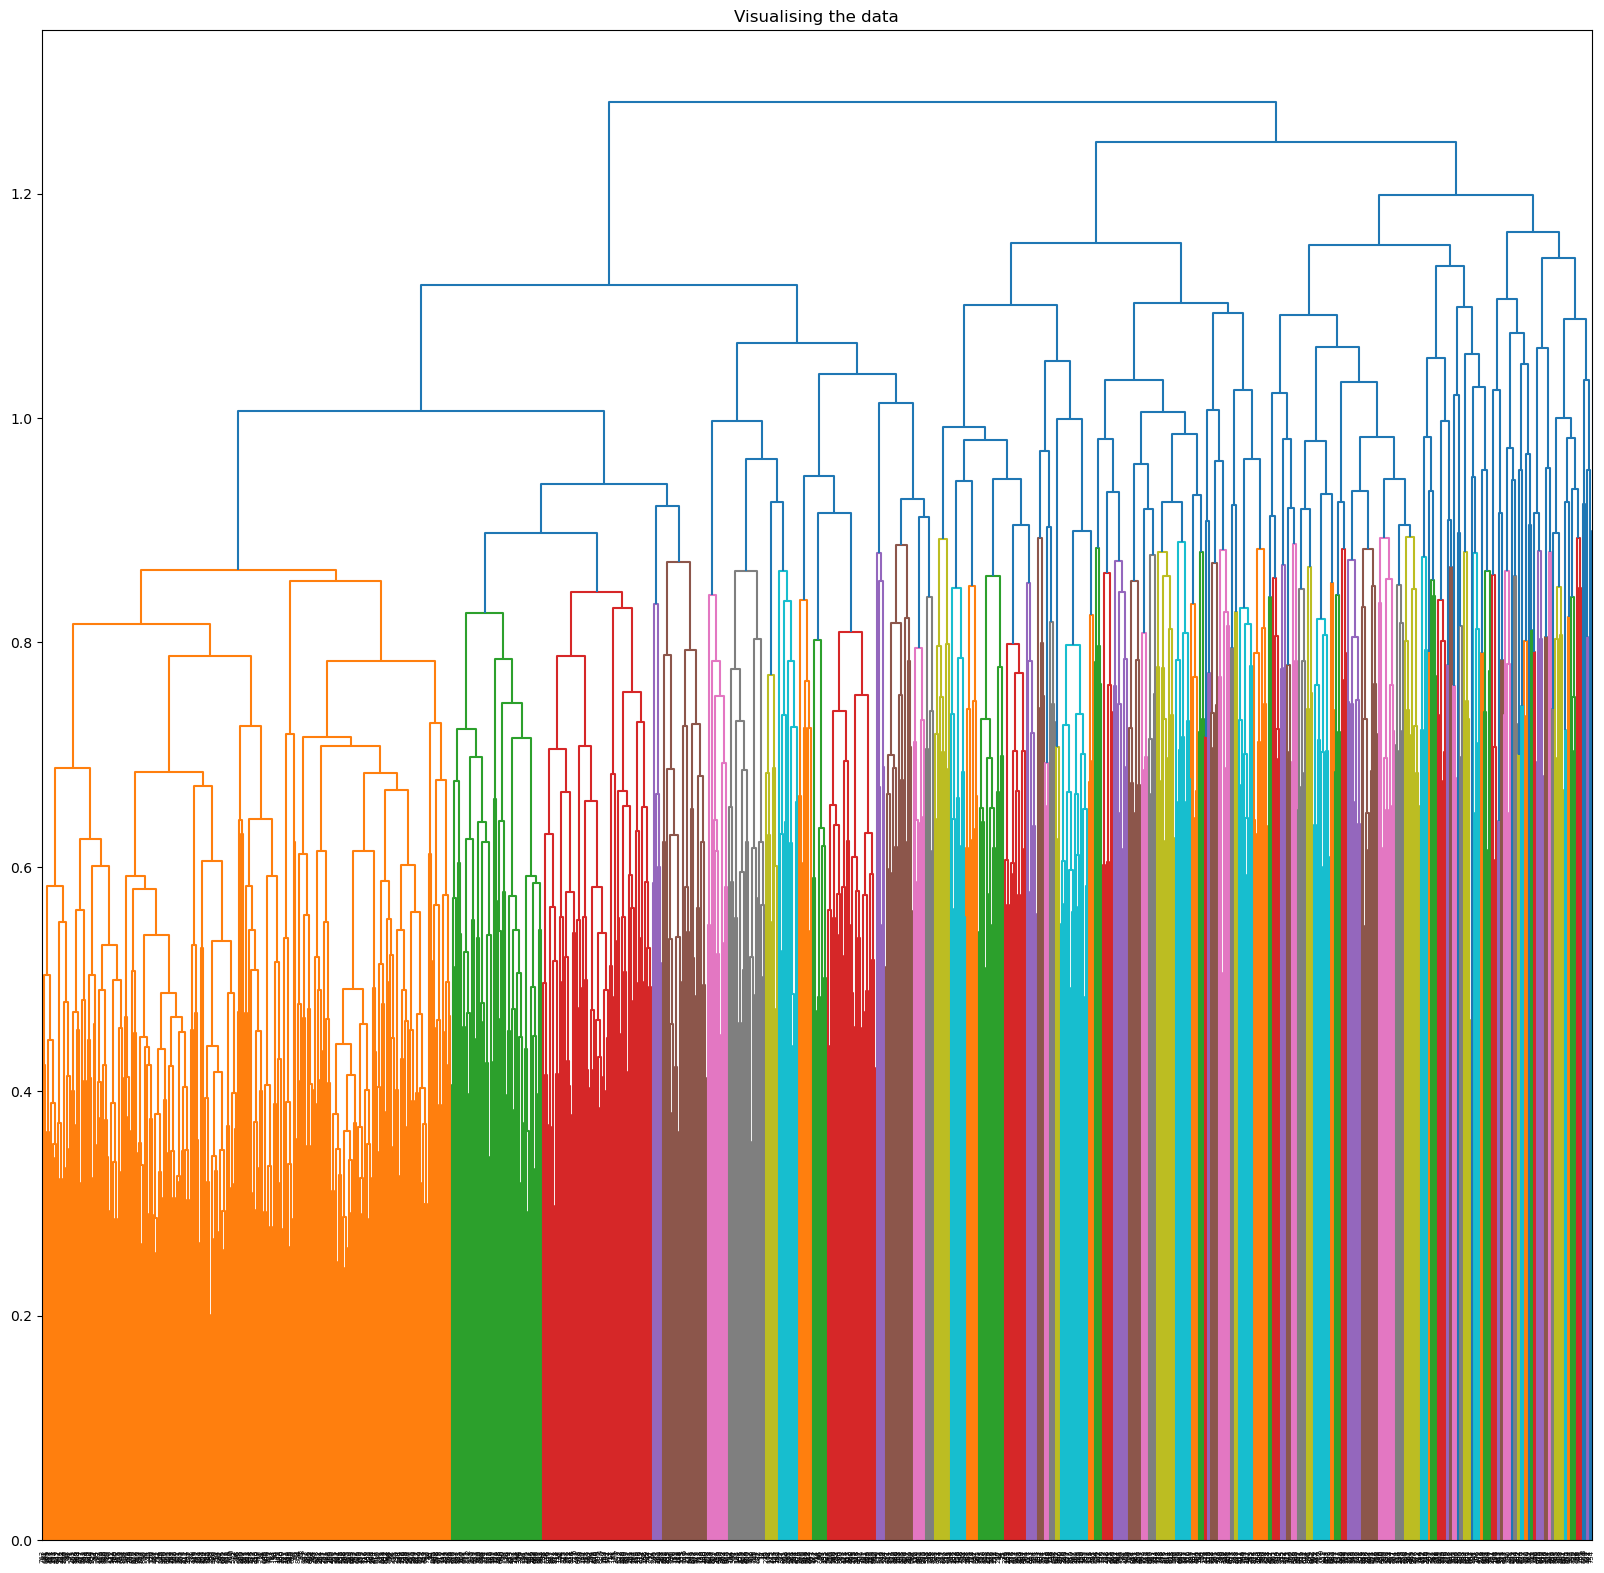

In [23]:
plt.figure(figsize =(20, 20),dpi=100)
plt.title('Visualising the data')

fit_agglomerative = shc.linkage(sample_data, method ='complete')
Dendrogram = shc.dendrogram(fit_agglomerative)

In [24]:
fit_agglomerative.shape

(999, 4)

In [98]:
# data_df.iloc[[26,21,39,20,35],:]

In [112]:
sample_data = actual_data[:1000]

# Agglomerative Clustering using sklearn

In [35]:
# hier_clustering = AgglomerativeClustering(n_clusters=15).fit(actual_data)

# hier_clustering.labels_

# sil_score = silhouette_score(actual_data,hier_clustering.labels_)



# # plt.plot([2, 3, 4, 5, 6, 7, 8, 9],[36135.895, 35738.68 , 35463.18 , 35216.54 , 35082.195, 34956.137, 34837.11 , 34725.938])

# Spectral Clustering

In [32]:
# clustering = (n_clusters=2,assign_labels='discretize',random_state=0).fit(sample_data)

sil_score = silhouette_score(sample_data,clustering.labels_)

# sil_score






# Latent Dirichlet Allocation

In [10]:
cv = CountVectorizer()


In [11]:
df = cv.fit_transform(data_df['cleaned'])


In [12]:
df

<11312x84968 sparse matrix of type '<class 'numpy.int64'>'
	with 1721118 stored elements in Compressed Sparse Row format>

In [13]:
vocab = cv.get_feature_names()

C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [14]:
# vocab

['00',
 '000',
 '00000',
 '00001',
 '0001',
 '0006178057rm',
 '002',
 '004',
 '0048330804',
 '0060313825',
 '0062222227',
 '007',
 '0096',
 '010',
 '012',
 '01em',
 '02',
 '0230',
 '0246108118',
 '0283986026',
 '0283988134',
 '029270769x',
 '03',
 '0316074144',
 '0316074152',
 '0316127191',
 '0330',
 '0356500098',
 '0374350493',
 '0385127855',
 '0441812929',
 '0441812937',
 '0446602078',
 '0451214463',
 '05',
 '052594754x',
 '0530',
 '0586041168',
 '06',
 '061354',
 '0618154558',
 '064848',
 '0670883514',
 '0671247298',
 '067165649x',
 '0730',
 '075',
 '0752851667',
 '075824',
 '0879973862',
 '0879976039',
 '0879977590',
 '0900',
 '092',
 '093',
 '094',
 '0949206776',
 '0949206784',
 '0949206792',
 '0s',
 '10',
 '100',
 '1000',
 '10000',
 '100000',
 '1000000',
 '100000000',
 '10001200',
 '1000mile',
 '1000pound',
 '1000x',
 '1001',
 '10010000',
 '100101',
 '10012',
 '1005',
 '1007',
 '10070',
 '100m',
 '100page',
 '100th',
 '100yard',
 '100year',
 '100yearold',
 '101',
 '10100',
 '1011

In [16]:
lda = LatentDirichletAllocation(n_components = 20, doc_topic_prior=1).fit(df)


In [46]:
import numpy as np 
topic_words = {}
n_top_words = 10
for topic, comp in enumerate(lda.components_):
    # for the n-dimensional array "arr":
    # argsort() returns a ranked n-dimensional array of arr, call it "ranked_array"
    # which contains the indices that would sort arr in a descending fashion
    # for the ith element in ranked_array, ranked_array[i] represents the index of the
    # element in arr that should be at the ith index in ranked_array
    # ex. arr = [3,7,1,0,3,6]
    # np.argsort(arr) -> [3, 2, 0, 4, 5, 1]
    # word_idx contains the indices in "topic" of the top num_top_words most relevant
    # to a given topic ... it is sorted ascending to begin with and then reversed (desc. now)    
    word_idx = np.argsort(comp)[::-1][:n_top_words]

    # store the words most relevant to the topic
    topic_words[topic] = [vocab[i] for i in word_idx]
    
for topic, words in topic_words.items():
    print('Topic: %d' % topic)
    print('  %s' % ', '.join(words))

Topic: 0
  kill, king, return, one, de, take, find, armi, narrat, becom
Topic: 1
  david, famili, henri, father, mother, find, jame, becom, one, love
Topic: 2
  book, novel, stori, chapter, charact, life, state, one, also, work
Topic: 3
  forc, attack, dresden, kill, new, war, luke, order, take, battl
Topic: 4
  find, one, team, use, kill, time, crew, ship, captain, attack
Topic: 5
  paul, rachel, kill, philip, laura, thoma, nick, get, jason, perci
Topic: 6
  father, live, mother, famili, young, becom, life, year, love, marri
Topic: 7
  king, queen, princ, find, return, power, princess, lord, take, castl
Topic: 8
  human, earth, ship, planet, world, use, time, alien, new, one
Topic: 9
  magic, find, one, ben, take, island, live, peopl, father, come
Topic: 10
  sam, one, famili, life, becom, adam, friend, new, find, year
Topic: 11
  kill, murder, anna, find, one, take, death, investig, meet, two
Topic: 12
  harri, find, one, use, time, kill, take, attack, back, power
Topic: 13
  tell, g

'old major  old boar manor farm  call anim farm meet  compar human parasit teach anim revolutionari song  beast england   major die  two young pig  snowbal napoleon  assum command turn dream philosophi  anim revolt drive drunken irrespons mr jone farm  renam  anim farm   adopt seven command anim  import   anim equal   snowbal attempt teach anim read write  food plenti  farm run smoothli  pig elev posit leadership set asid special food item  ostens person health  napoleon take pup farm dog train privat  napoleon snowbal struggl leadership  snowbal announc plan build windmil  napoleon dog chase snowbal away declar leader  napoleon enact chang govern structur farm  replac meet committe pig  run farm  use young pig name squealer  mouthpiec   napoleon claim credit windmil idea  anim work harder promis easier live windmil  violent storm  anim find windmil annihil  napoleon squealer convinc anim snowbal destroy  although scorn neighbour farmer suggest wall thin  snowbal becom scapegoat  napol

In [38]:

tf_vectorizer = CountVectorizer(vocabulary=vocab)
tf = tf_vectorizer.fit_transform(data_df['cleaned'].tolist())

# transform method returns a matrix with one line per document, columns being topics weight
predict = lda.transform(tf)
print(predict)

[[0.00485485 0.00364208 0.18875794 ... 0.00375452 0.00457075 0.00405041]
 [0.01800235 0.01479789 0.18506801 ... 0.0077523  0.00652121 0.00409509]
 [0.0582327  0.10979326 0.18153525 ... 0.00527334 0.01361018 0.02710165]
 ...
 [0.95359641 0.00144909 0.00156736 ... 0.00156626 0.00155259 0.00224413]
 [0.01262326 0.03467551 0.11290945 ... 0.2280575  0.01039568 0.01005519]
 [0.09575891 0.00953188 0.6299215  ... 0.01222241 0.01023883 0.01002319]]


In [59]:
predict[0]

array([0.00485485, 0.00364208, 0.18875794, 0.00798516, 0.00565468,
       0.00301327, 0.00392931, 0.00358825, 0.08983324, 0.00870978,
       0.00617987, 0.00540231, 0.00595209, 0.09265179, 0.00533065,
       0.00721237, 0.5449267 , 0.00375452, 0.00457075, 0.00405041])

In [39]:
tops = np.argmax(predict,axis=1)

In [51]:
data_df['cleaned']

0        old major  old boar manor farm  call anim farm...
1        alex  teenag live nearfutur england  lead gang...
2        text plagu divid five part  town oran  thousan...
3        argument enquiri proce seri increment step  se...
4        novel posit space around milki way divid conce...
                               ...                        
11307    inspector han bärlach  end career suffer cance...
11308     kill zebede    open direct address reader oth...
11309    stori begin year 1463 dr meet xoralarrin hous ...
11310    stepona daumanta  elderli poet  walk street vi...
11311    eponym paradox democraci collect essay deal in...
Name: cleaned, Length: 11312, dtype: object

In [52]:
tops

array([16, 13,  4, ...,  0,  6,  2], dtype=int64)

In [41]:
topics_act = [topic_words[x] for x in tops]

In [47]:
np.histogram(tops,bins=20)

(array([ 412,  428, 1959,  316,  388,  306, 1003,  266,  993,  470,  483,
         336,  399, 1413,  386,  438,  360,  280,  394,  282], dtype=int64),
 array([ 0.  ,  0.95,  1.9 ,  2.85,  3.8 ,  4.75,  5.7 ,  6.65,  7.6 ,
         8.55,  9.5 , 10.45, 11.4 , 12.35, 13.3 , 14.25, 15.2 , 16.15,
        17.1 , 18.05, 19.  ]))

In [48]:
lst = [ 412,  428, 1959,  316,  388,  306, 1003,  266,  993,  470,  483,336,  399, 1413,  386,  438,  360,  280,  394,  282]

In [58]:
tops

array([16, 13,  4, ...,  0,  6,  2], dtype=int64)

In [54]:
tops==16

array([ True, False, False, ..., False, False, False])